# MiniProyecto 2: Segmentación de higado en volumenes MRI

## Entrega 2:
En la anterior entrega hemos desarrollado un algoritmo completo de segmentación para el hígado en MRIs. Los resultados no son perfectos y tendremos numerosos falsos positivos, falsos negativos, huecos, protuberancias y bahias dentro de nuetras mascaras de segmentación que disminuirán nuestras metricas de evaluación. Para poder refinar nuestros resultados tenemos 2 posibilidades, mejorar las imagenes originales para facilitar el trabajo del algoritmo de predicción en las zonas de peor rendimiento o mejorar la mascara de predicción con morfología matematica para pulir las imperfecciones y subir las métricas de evaluación.


### Parte 1: Exploración de base de datos

Como aprendimos anteriormente, lo primero que debemos hacer es familiarizarnos con la base de datos final. En la entrega anterior solamente observamos algunas de las volúmenes de nuestra base de datos pero esta vez tendremos a nuestra disposición todos los volúmenes.

#### Parte 1.1: Importación de imagenes y anotaciones

Use la siguiente celda para cargar todos los volumenes de las carpeta DB/train, valid, test y guardarlos en un diccionario, donde las llaves serán los numeros de paciente y los values serán los volumenes como tal. Guarde los volumenes de MRI y los volumenes de segmentación en diferentes diccionarios.

> - **Nota** Para poder abrir los volumenes debe usar la función *load* y la función *get_fdata*. Puede ver un ejemplo en este link https://nipy.org/nibabel/gettingstarted.html. Si quiere distinguir entre segmentación y volumen o extraer el numero del paciente, use el nombre de los archivos y el .split().

> - Si el path es DB/train/volume-1.nii sabemos que es el paciente 1 y el volumen 1 (no la segmentación) si realizamos .split('/') obtenemos un arreglo con ['DB','train','volume-1.nii']

> - Use os.sep para saber cual es el separador de su sistema operativo.

In [1]:
from glob import glob
import os
import nibabel as nib
import numpy as np

train_vols={} #diccionario de los volumenes de entrenamiento
train_seg={} #diccionario de los volumenes de segmentacion de entrenamiento

valid_vols={} #diccionario de los volumenes de validacion
valid_seg={} #diccionario de los volumenes de segmentacion de validacion

test_vols={} #diccionario de los volumenes de test
test_seg={} #diccionario de los volumenes de segmentacion de test


vols_path_train=glob(os.path.join('DB','train','*.nii.gz')) #lista de paths de los volumenes de train
# YOUR CODE HERE
for path in vols_path_train:
    tipo, paciente = path.split('\\')[-1].split('.')[0].split('-')
    if tipo == 'volume':
        train_vols[paciente] = nib.load(path).get_fdata()
    elif tipo == 'segmentation':
        train_seg[paciente] = nib.load(path).get_fdata()

vols_path_valid=glob(os.path.join('DB','valid','*.nii.gz')) #lista de paths de los volumenes de train
# YOUR CODE HERE
for path in vols_path_valid:
    tipo, paciente = path.split('\\')[-1].split('.')[0].split('-')
    if tipo == 'volume':
        valid_vols[paciente] = nib.load(path).get_fdata()
    elif tipo == 'segmentation':
        valid_seg[paciente] = nib.load(path).get_fdata()

vols_path_test=glob(os.path.join('DB','test','*.nii.gz')) #lista de paths de los volumenes de train
# YOUR CODE HERE
for path in vols_path_test:
    tipo, paciente = path.split('\\')[-1].split('.')[0].split('-')
    if tipo == 'volume':
        test_vols[paciente] = nib.load(path).get_fdata()
    elif tipo == 'segmentation':
        test_seg[paciente] = nib.load(path).get_fdata()

In [2]:
assert len(train_vols.keys())==3, f'Los volumenes en entrenamiento deberian ser 3 y son {len(train_vols.keys())}'
assert len(train_seg.keys())==3, f'Los volumenes de segmentacion en entrenamiento deberian ser 3 y son {len(train_seg.keys())}'
assert train_seg['1'].shape[0]==512, f'El volumen 1 no se encuentra en la llave 1'
assert np.isclose(np.sum(train_seg['1']),658167,0.01), f'El volumen de segmentacion 1 no se encuentra en la llave 1'
assert np.isclose(np.sum(valid_seg['10']),2905986,0.01), f'El volumen de segmentacion 10 no se encuentra en la llave 10' 

#### Parte 1.2 Distribución de la base de datos
Ya tenemos distribuido nuestro dataset en diccionarios facilmente accesibles vamos a explorar la distribución de los datos. Al igual que en los problemas de detección, tendremos una distribución de etiquetas dentro de cada dato, recuerden que nuestros datos son volumenes. Esta fue una implementación parecida a la que hicimos en la entrega pasada por lo que no deben implementar nada. Esto solo servirá para ver que la distribución es similar en todos los volúmenes.

In [3]:
keys_train=train_seg.keys()
keys_valid=valid_seg.keys()
keys_test=test_seg.keys()

labels_train=[]
for i in keys_train:
    labels_train.append(np.unique(train_seg[i]))
labels_train=np.unique(labels_train)

labels_valid=[]
for i in keys_valid:
    labels_valid.append(np.unique(valid_seg[i]))
labels_valid=np.unique(labels_valid)

labels_test=[]
for i in keys_test:
    labels_test.append(np.unique(test_seg[i]))
labels_test=np.unique(labels_test)

In [4]:
label_0_train=0
label_1_train=0
label_2_train=0

label_0_valid=0
label_1_valid=0
label_2_valid=0

label_0_test=0
label_1_test=0
label_2_test=0

for i in keys_train:
    label_0_train+=np.sum(train_seg[i]==0)
    label_1_train+=np.sum(train_seg[i]==1)
    label_2_train+=np.sum(train_seg[i]==2)
for i in keys_valid:
    label_0_valid+=np.sum(valid_seg[i]==0)
    label_1_valid+=np.sum(valid_seg[i]==1)
    label_2_valid+=np.sum(valid_seg[i]==2)
for i in keys_test:
    label_0_test+=np.sum(test_seg[i]==0)
    label_1_test+=np.sum(test_seg[i]==1)
    label_2_test+=np.sum(test_seg[i]==2)

In [5]:
print ("{:<8} | {:<15} {:<20}".format('Fold','Clase','Total voxeles por clase'))
print ('----------------------------------------------------------------------------')
print ("{:<8} | {:<15} {:<20}".format('Train',labels_train[0],label_0_train))
print ("{:<8} | {:<15} {:<20}".format('Train',labels_train[1],label_1_train))
print ("{:<8} | {:<15} {:<20}".format('Train',labels_train[2],label_2_train))

print ("{:<8} | {:<15} {:<20}".format('Valid',labels_valid[0],label_0_valid))
print ("{:<8} | {:<15} {:<20}".format('Valid',labels_valid[1],label_1_valid))
print ("{:<8} | {:<15} {:<20}".format('Valid',labels_valid[2],label_2_valid))

print ("{:<8} | {:<15} {:<20}".format('Test',labels_test[1],label_1_test))
print ("{:<8} | {:<15} {:<20}".format('Test',labels_test[2],label_2_test))

Fold     | Clase           Total voxeles por clase
----------------------------------------------------------------------------
Train    | 0.0             380543992           
Train    | 1.0             6398502             
Train    | 2.0             1554914             
Valid    | 0.0             128452468           
Valid    | 1.0             2857366             
Valid    | 2.0             24310               
Test     | 1.0             3033572             
Test     | 2.0             32422               


In [6]:
assert len(labels_train)==3, 'Estas contando de más o menos las etiquetas dentro del dataset'
assert np.min(labels_train)==0, 'No estas contando la etiqueta 0'
assert np.max(labels_train)==2, 'No estas contando la etiqueta 2'
assert np.isclose(label_0_train+label_1_train,label_2_train,388497408,0.01), 'No esta mirando todo el dataset de entrenamiento'
assert np.isclose(label_0_train,380543992,0.001), f'La cantidad de voxeles de la clase 0 en entrenamiento debería ser 380543992 y es {label_0_train}'

### Parte 2: Operación morfológica como pre-procesamiento
Hasta ahora, hemos realizado un proceso de pre-procesamiento basado unicamente en la corrección de intensidades y la ecualización o especificación de histogramas. Estos procesos se basan casi exclusivamente en las intensidades de los pixeles, obviando la posible relación entre los pixeles y sus vecindades. En esta ocasión, usaremos las herramientas de la morfología matematica pero aplicada a **escala de grises** como metodo de pre-procesamiento.

#### Parte 2.1: Operaciones morfologicas como pre-procesamiento
Hemos podido observar aquellos pixeles que son errores en nuestra predicción, ahora debemos realizar un pre-procesamiento en escala de grises sobre los volumenes originales para facilitar el trabajo de segmentación de nuestro modelo. En la siguiente celda utilice la libreria skimage.morphology y las funciones *erosion* y *dilation*  con un elemento estructurante de *ball* de radio 3 y haga la resta entre el volumen original y la apertura. Vea https://scikit-image.org/docs/stable/api/skimage.morphology.html para más información. Visualize el resultado en sus 3 ejes en los slices que desee.

In [7]:
import nibabel as nib
from matplotlib import pyplot as plt
import numpy as np
import os
from skimage.exposure import equalize_hist,match_histograms
from skimage.filters import threshold_otsu as otsu
import cv2
from skimage.measure import label
from skimage.morphology import ball,erosion,dilation

vol_pre='' #volumen pre-procesado
volume1='' #volumen de entrenamiento 1 (volume-1)
segmen1='' #volumen de segmentación de entrenamiento 1 (segmentation-1)
# YOUR CODE HERE
volume1 = train_vols['1']
segmen1 = train_seg['1']
segmen1[segmen1 == 2] = 1
vol_pre = volume1 - dilation(erosion(volume1, footprint=ball(3)), footprint=ball(3)) # original - apertura

C:\Users\eduar\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


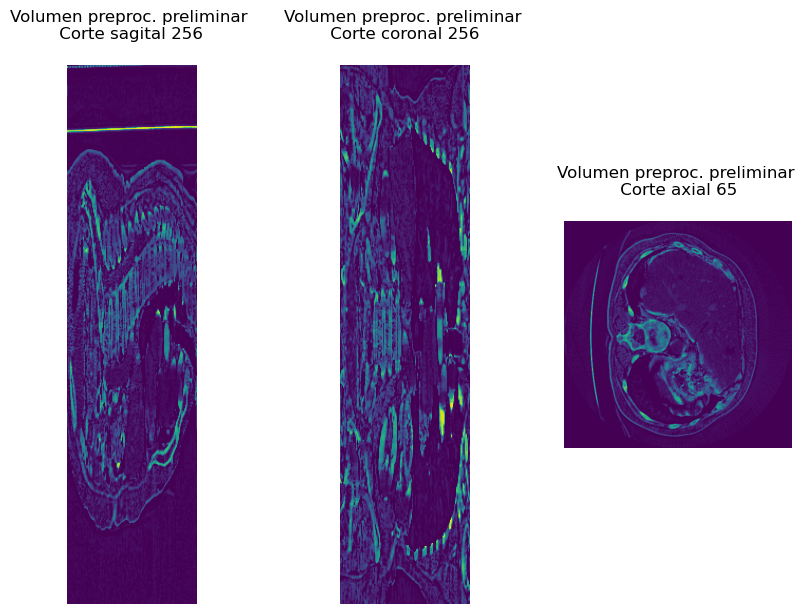

In [8]:
# Graficamos el resultado en sus 3 ejes
fig, axs = plt.subplots(1,3, figsize=(10,7))
#plt.subplots_adjust(hspace=0.6)
#plt.suptitle('Resultados preliminares')
corte_sagital, corte_coronal, corte_axial = vol_pre.shape[0]//2, vol_pre.shape[1]//2, 65

# Volumen preliminar
axs[0].imshow(vol_pre[corte_sagital,:,:])
axs[0].axis('off')
axs[0].set_title(f'Volumen preproc. preliminar \n Corte sagital {corte_sagital} \n')

axs[1].imshow(vol_pre[:,corte_coronal,:])
axs[1].axis('off')
axs[1].set_title(f'Volumen preproc. preliminar \n Corte coronal {corte_coronal} \n')

axs[2].imshow(vol_pre[:,:,corte_axial])
axs[2].axis('off')
axs[2].set_title(f'Volumen preproc. preliminar \n Corte axial {corte_axial} \n')

plt.show()

In [9]:
assert len(np.unique(vol_pre))>2, 'Deberia estar haciendo el pre-procesamiento en el volumen original, no en el predicho ni en el groundtruth'
assert np.isclose(np.sum(vol_pre!=0),21346345,0.01), 'No calculó bien el pre-procesamiento'

Podemos observar que el resultado anterior son las estructuras más brillantes que son de menor tamaño a nuestro elemento estructurante. Ahora que los tenemos extraidos, ubralice esta mascara para obtener solo los valores entre 0.2 y 1, y elimine estas estructuras de el volumen original para no tenerlas en cuenta.

> **Sugerencia:** Usted quiere eliminar los pixeles del volumen original que se encuentran en la nueva mascara creada, por lo que el objetivo será restar a cada pixel su **misma intensidad**. Piense como obtener la intensidad original de los pixeles de la mascara. 

Compare el resultado de la segmentación que usted propuso en un inicio con el volumen orignial y con este nuevo volumen. Haga un subplot donde se pueda ver el resultado en los 3 ejes.

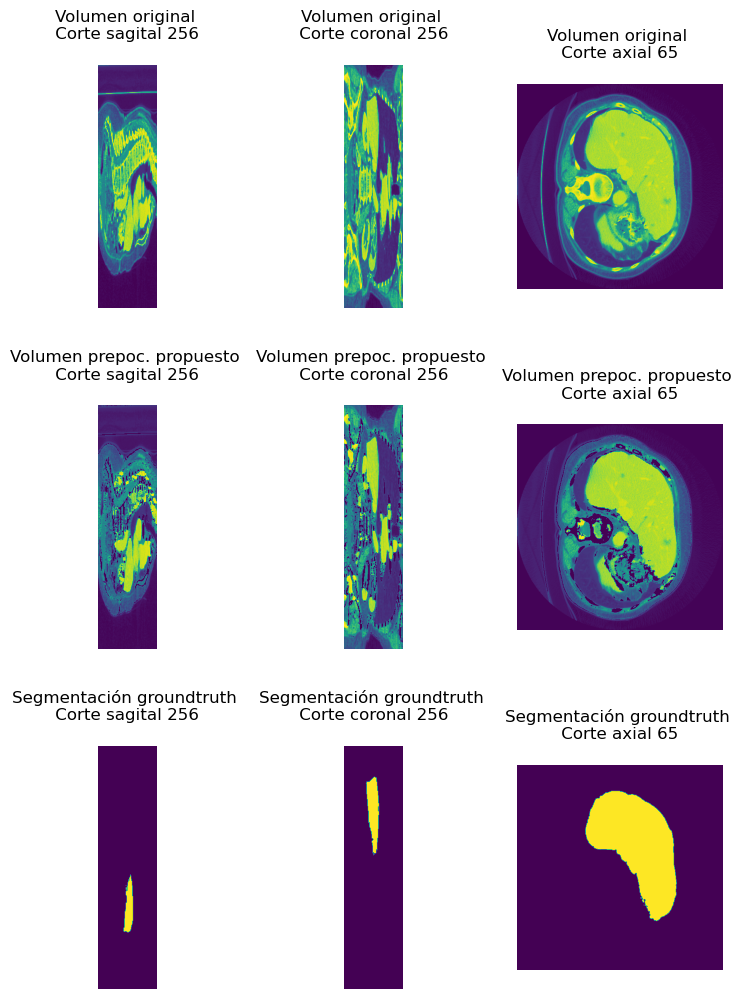

In [10]:
vol_pre_total='' #volumen pre-procesado completamente
# YOUR CODE HERE
mask_binary = np.logical_and(vol_pre>0.2, vol_pre<1) # mascara binaria donde se cumple el umbral
mask = mask_binary * volume1 # mascara que tiene las intensidades originales

vol_pre_total = volume1 - mask


# Graficamos los resultados en sus 3 ejes
fig, axs = plt.subplots(3,3, figsize=(9,12)) # ancho, alto
plt.subplots_adjust(hspace=0.4)
corte_sagital, corte_coronal, corte_axial = volume1.shape[0]//2, volume1.shape[1]//2, 65

volumenes = [volume1, vol_pre_total, segmen1]
nombres = ['Volumen original', 'Volumen prepoc. propuesto', 'Segmentación groundtruth']

for i in range(3):
    axs[i,0].imshow(volumenes[i][corte_sagital,:,:])
    axs[i,0].axis('off')
    axs[i,0].set_title(f'{nombres[i]} \n Corte sagital {corte_sagital} \n')
    
    axs[i,1].imshow(volumenes[i][:,corte_coronal,:])
    axs[i,1].axis('off')
    axs[i,1].set_title(f'{nombres[i]} \n Corte coronal {corte_coronal} \n')    
    
    axs[i,2].imshow(volumenes[i][:,:,corte_axial])
    axs[i,2].axis('off')
    axs[i,2].set_title(f'{nombres[i]} \n Corte axial {corte_axial} \n')

plt.show()

In [11]:
assert len(np.unique(vol_pre_total))!=2, 'No hizo el pre-procesamiento completo en el volumen original sino en otro volumen'
assert np.min(vol_pre_total)>=0, 'Seguramente restó la mascara binaria directamente'
assert np.isclose(np.sum(vol_pre_total>0.8),1490437,0.1), 'No realizó bien el pre-procesamiento para eliminar las estructuras en el volumen original'

Veamos como afecta este preprocesamiento a nuestro metodo de segmentación. En esta celda vamos a copiar algunas funciones de la entrega pasada.

In [12]:
def Jaccard_3D(Im,Gt):
    '''
    :param Im: Volumen de prediccion.
    :param Gt: Segmentacion groundtruth.
    '''
    # YOUR CODE HERE
    inter = np.sum ( np.logical_and(Im, Gt) )
    union = np.sum( np.logical_or(Im, Gt) )
    J = inter / union
    return J

def errores(segment_pred,segmen1):
    'segment_pred (ndarray): volumen de predicción'
    'segmen1 (ndarray): volumen de groundtruth'
    # YOUR CODE HERE
    FP_volumes = np.logical_and(segment_pred, np.logical_not(segmen1))
    FN_volumes = np.logical_and(segmen1, np.logical_not(segment_pred))
    return FP_volumes,FN_volumes

def Vol2D_max_component(Vol,umbral,operador):
    # YOUR CODE HERE
    segmentacion = np.zeros(Vol.shape)
    for i in range(Vol.shape[2]):
        segmentacion[:,:,i] = max_component(Vol[:,:,i], umbral, operador)
    return segmentacion

def max_component(Im,umbral,operador):
    'Im (ndarray): Imagen a segmentar'
    'umbral (float): Umbral a utilizar'
    'operador (str): Puede ser "mayor" para > o "menor" para < segun se quiera umbralizar'
    # YOUR CODE HERE
    
    # Umbralizamos
    if operador == 'mayor':
        Im = Im > umbral
    elif operador == 'menor':
        Im = Im < umbral
    
    # encontramos el label del mayor componente
    labeled_img, n_labels = label(Im, return_num=True)
    label_mayor, label_count = 0, 0
    for label_i in range(1, n_labels+1):
        label_i_count = np.sum(labeled_img==label_i)
        if label_i_count > label_count:
            label_mayor = label_i
            label_count = label_i_count
    
    # encontramos el mayor componente
    max_comp = (labeled_img == label_mayor) * Im
    return max_comp

In [13]:
aux_segment=Vol2D_max_component(volume1,0.8,'mayor')
fp,fn=errores(aux_segment,segmen1)

J_sinpre=Jaccard_3D(aux_segment,segmen1)
segment_conpre=Vol2D_max_component(vol_pre_total,0.8,'mayor')
J_conpre=Jaccard_3D(segment_conpre,segmen1)

print(f'El jaccard sin preprocesamiento es: {J_sinpre}')
print(f'El jaccard con preprocesamiento es: {J_conpre}')

El jaccard sin preprocesamiento es: 0.4699484935641678
El jaccard con preprocesamiento es: 0.5908966340742481


In [14]:
fp2,fn2=errores(segment_conpre,segmen1)
print(f'Los falsos positivos del volumen no preprocesado es {np.sum(fp)}')
print(f'Los falsos positivos del volumen preprocesado es {np.sum(fp2)}')

print(f'Los falsos negativos del volumen no preprocesado es {np.sum(fn)}')
print(f'Los falsos negativos del volumen preprocesado es {np.sum(fn2)}')

Los falsos positivos del volumen no preprocesado es 663620
Los falsos positivos del volumen preprocesado es 370737
Los falsos negativos del volumen no preprocesado es 33182
Los falsos negativos del volumen preprocesado es 47248


Como podemos observar, el preprocesamiento aumentó los falsos negativos pero disminuyó los falsos positivos. El procesamiento que realizamos se ve beneficiado si se sobresegmenta.

El anterior procesamiento fue tan solo un ejemplo de lo que podemos lograr hacer con la morfología matematica en escala de grises. Planee una linea de base similar que le pueda ayudar a eliminar elementos que no le interesan o resaltar los objetos que si. Existen muchos algoritmos de morfología matematica y la combinación de ellos nos permiten hacer procesamientos verdaderamente interesantes. Luego, haga experimentos (minimo 4) con el tamaño, la forma y las dimensiones (2D o 3D) del elemento estructurante. El elemento estructurante que nosotros usamos era una Bola de radio 3, un elemento de 3 dimensiones que tiene skimage.morphology, ustedes pueden usar estos elementos estrcutrantes o diseñar uno como una matriz de numpy.

>**Nota:** Cree una linea de base verdaderamente util y que le ayude a mejorar sus metricas, no haga un procesamiento solo por hacerlo, de igual forma para los experimentos con el elemento estructurante. Observe sus volumenes de FP y de FN, seguramente les dará una idea.


>**Recuerde:** Estos procesamientos se hacen como pre-procesamiento, es decir, en el volumen original y no en la segmentación ya hecha.

**Bono:** Si usted logra eliminar los riñones mediante preprocesamiento, agregue esta evidencia a su reporte y se le dará un bono. La evidencia que usted proporcione debe ser mostrada de forma oportuna, piense como demostrar sus resultados y, mas importante aun, su procedimiento.

Experimento 1: el elemento estructurante es una bola de tamaño 4
El jaccard con preprocesamiento dado es: 0.591
El jaccard con preprocesamiento del exp. evaluado es: 0.616
Los falsos positivos del volumen preprocesado dado es 370737
Los falsos positivos del volumen preprocesado experimento es 301466
Los falsos negativos del volumen preprocesado dado es 47248
Los falsos negativos del volumen preprocesado experimento es 64220

Experimento 2: el elemento estructurante es una matriz 3D de dimensiones (7, 40, 7)
El jaccard con preprocesamiento dado es: 0.591
El jaccard con preprocesamiento del exp. evaluado es: 0.703
Los falsos positivos del volumen preprocesado dado es 370737
Los falsos positivos del volumen preprocesado experimento es 125761
Los falsos negativos del volumen preprocesado dado es 47248
Los falsos negativos del volumen preprocesado experimento es 105244

Experimento 3: el elemento estructurante es un octaedro de tamaño 3
El jaccard con preprocesamiento dado es: 0.591
El jacc

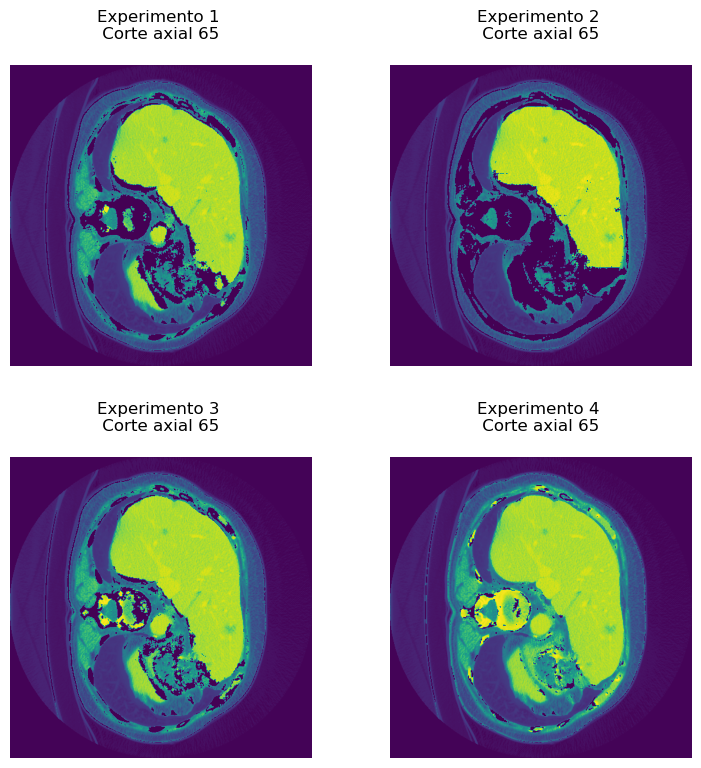

In [15]:
# YOUR CODE HERE
import time
from skimage.morphology import opening, closing, octahedron, cube

def pre_total(vol_pre):
    mask_binary = np.logical_and(vol_pre>0.2, vol_pre<1) # mascara binaria donde se cumple el umbral
    mask = mask_binary * volume1 # mascara que tiene las intensidades originales
    vol_pre_total = volume1 - mask
    return vol_pre_total

def evaluar_preproc(vol_eval):
    
    segment_eval=Vol2D_max_component(vol_eval,0.8,'mayor')
    J_eval=Jaccard_3D(segment_eval,segmen1)
    print(f'El jaccard con preprocesamiento dado es: {round(J_conpre,3)}')
    print(f'El jaccard con preprocesamiento del exp. evaluado es: {round(J_eval,3)}')
    fp_eval,fn_eval=errores(segment_eval,segmen1)
    print(f'Los falsos positivos del volumen preprocesado dado es {np.sum(fp2)}')
    print(f'Los falsos positivos del volumen preprocesado experimento es {np.sum(fp_eval)}')
    print(f'Los falsos negativos del volumen preprocesado dado es {np.sum(fn2)}')
    print(f'Los falsos negativos del volumen preprocesado experimento es {np.sum(fn_eval)}')
    

# Experimento 1
def experimento1():
    print('Experimento 1: el elemento estructurante es una bola de tamaño 4')
    ee_exp1 = ball(4)
    vol_pre_exp1 = volume1 - opening(volume1, footprint=ee_exp1) # original - apertura
    vol_pre_total_exp1 = pre_total(vol_pre_exp1)
    evaluar_preproc(vol_pre_total_exp1)
    return vol_pre_total_exp1
    
# Experimento 2
def experimento2(vol=volume1, imprimir=True):
    if imprimir: print('\nExperimento 2: el elemento estructurante es una matriz 3D de dimensiones (7, 40, 7)')
    size_x, size_y, size_z = 7, 40, 7 # coronal el mayor
    ee_exp2 = np.ones((size_x, size_y, size_z), dtype=bool)

    vol_pre_exp2 = vol - opening(vol, footprint=ee_exp2) # original - apertura
    vol_pre_total_exp2 = pre_total(vol_pre_exp2)
    if imprimir: evaluar_preproc(vol_pre_total_exp2)
    return vol_pre_total_exp2

# Experimento 3
def experimento3():
    print('\nExperimento 3: el elemento estructurante es un octaedro de tamaño 3')
    ee_exp3 = octahedron(3)
    vol_pre_exp3 = volume1 - opening(volume1, footprint=ee_exp3) # original - apertura
    vol_pre_total_exp3 = pre_total(vol_pre_exp3)
    evaluar_preproc(vol_pre_total_exp3)
    return vol_pre_total_exp3
    
# Experimento 4
def experimento4():
    print('\nExperimento 4: el elemento estructurante es un cubo de tamaño 3')
    ee_exp4 = cube(3)
    vol_pre_exp4 = volume1 - opening(volume1, footprint=ee_exp4) # original - apertura
    vol_pre_total_exp4 = pre_total(vol_pre_exp4)
    evaluar_preproc(vol_pre_total_exp4)
    return vol_pre_total_exp4

exp1_pre = experimento1()
exp2_pre = experimento2()
exp3_pre = experimento3()
exp4_pre = experimento4()
print('\nEl experimento que arrojó un mejor resultado fue el 2, con un Jaccard de 0.703')


# Graficamos los experimentos
# La imagen parece estar reflejada en el eje x (hígado debería estar al lado derecho de la columna)
corte_axial = 65
plt.figure(figsize=(9,9))
plt.subplots_adjust(hspace=0.3) 
exps = [exp1_pre, exp2_pre, exp3_pre, exp4_pre]

for i in range(4):
    plt.subplot(int(220+i+1))
    plt.imshow(exps[i][:,:,corte_axial])
    plt.axis('off')
    plt.title(f'Experimento {i+1} \n Corte axial {corte_axial} \n')
plt.show()

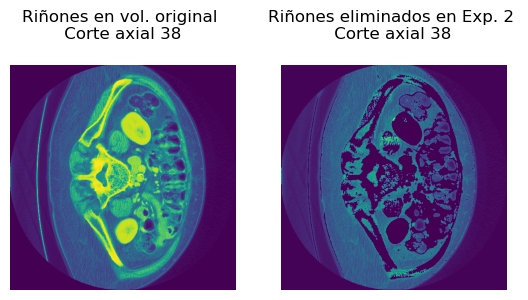

In [16]:
# BONO

corte_axial = 38 # riñones en corte 38
fig,ax=plt.subplots(1,2)

ax[0].imshow(volume1[:,:,corte_axial])
ax[0].axis('off')
ax[0].set_title(f'Riñones en vol. original \n Corte axial {corte_axial} \n')   

ax[1].imshow(exp2_pre[:,:,corte_axial])
ax[1].axis('off')
ax[1].set_title(f'Riñones eliminados en Exp. 2 \n Corte axial {corte_axial} \n')    

plt.show()

Por ultimo, cree una función que resuma por completo su preprocesamiento. Recuerde que la idea es que se mejore nuestra segmentación final, esta será parte de su nota. Cree la función que entre por parametro un volumen unicamente. El resto de parametros como elementos estructurantes, tamaños, umbrales, etc. deben ir por defecto.

In [17]:
def preprocesamiento_total(vol):
    # YOUR CODE HERE
    vol_pre_total = experimento2(vol, False)
    return vol_pre_total

In [18]:
vol_pre_total2=preprocesamiento_total(volume1)
vol_segmentado=Vol2D_max_component(vol_pre_total2,0.8,'mayor')
J_total=Jaccard_3D(vol_segmentado,segmen1)

assert J_total>J_conpre, 'El jaccard de su preprocesamiento total debe ser mayor al preprocesamiento propuesto'

### Parte 3: Operación morfológica como post-procesamiento
Otra metodología que podemos llevar a cabo para mejorar nuestras mascaras de segmentación es la morfología binaria en las mascaras de segmentación. A diferencia de el pre-procesamiento en escala de grises, que busca resaltar o eliminar elementos en la imagen original para facilitar el proceso de prediccion del modelo, el post-procesamiento busca eliminar imperfecciones de las mascaras predichas por el modelo. En ese sentido, el post-procesamiento lo diseñaremos en base a las imperfecciones de la mascara y conociendo la forma de nuestro objeto de interes, olvidandonos por completo de nuestra imagen original.

#### Parte 3.1: Visualización de la mascara binaria
Para poder diseñar una linea de base con la que podamos mejorar nuestra predicción final primero debemos visualizar los errores de nuestra mascara. Recuerden que, al igual que los filtros, un procesamiento puede ayudar a nuestro resultado final o empeorarlo, por lo que hacer un procesamiento a ciegas sin conocer las limitaciones de nuestro modelo es una mala idea. Recorra nuevamente todo su volumen de predicción con el mejor preprocesamiento encontrado en el punto anterior y obtenga un volumen que tenga los pixeles falsos positivos y los pixeles falsos negativos como en el primer punto. Visualice de la misma forma los slice con más FP y FN junto con la mascara original y su mascara predicha en un subplot.

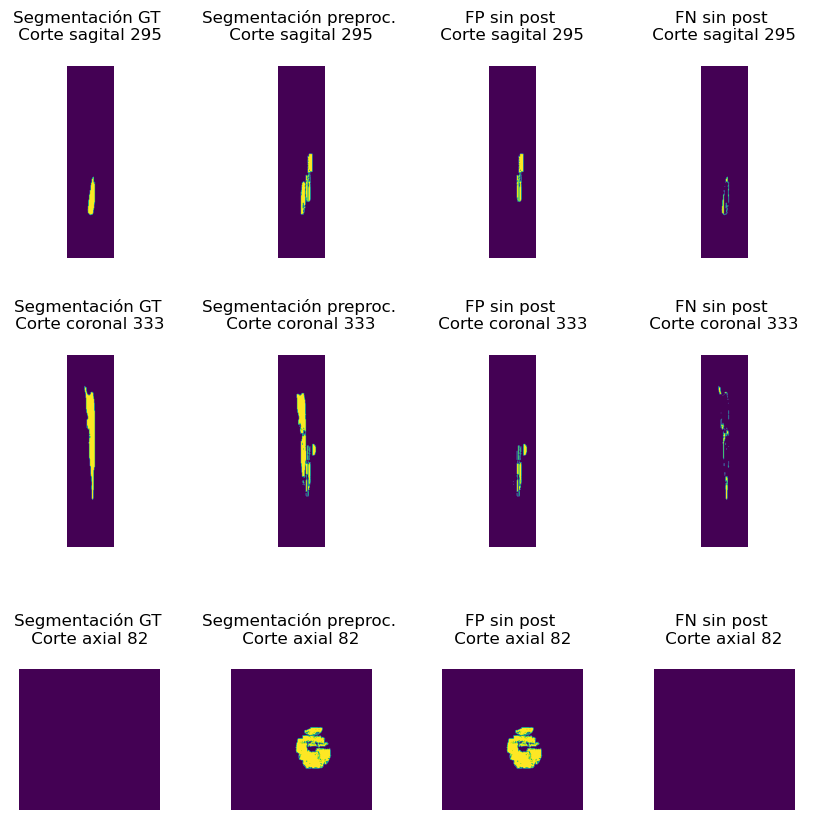

In [19]:
vol_preprocesado='' #volumen final pre-procesado
vol_segmentado='' #volumen segmentado con el pre-procesamiento
FP_sinpost='' #volumen con pixeles unicamente Falsos Positivos
FN_sinpost='' #volumen con pixeles unicamente Falsos Negativos

def errores(segment_pred,segmen1):
    'segment_pred (ndarray): volumen de predicción'
    'segmen1 (ndarray): volumen de groundtruth'
    # YOUR CODE HERE
    FP_volumes = np.logical_and(segment_pred, np.logical_not(segmen1))
    FN_volumes = np.logical_and(segmen1, np.logical_not(segment_pred))
    return FP_volumes,FN_volumes

# YOUR CODE HERE
vol_preprocesado = vol_pre_total2
vol_segmentado = Vol2D_max_component(vol_pre_total2,0.8,'mayor')
FP_sinpost, FN_sinpost = errores(vol_segmentado, segmen1)

s_sag, s_cor, s_ax = 0, 0, 0
err_sag, err_cor, err_ax = 0, 0, 0

# encontramos el slice con más errores del eje sagital
for i in range(vol_preprocesado.shape[0]):
    err_slice_i =  np.sum(FP_sinpost[i,:,:]) + np.sum(FN_sinpost[i,:,:])
    if err_slice_i > err_sag:
        err_sag = err_slice_i
        s_sag = i

# encontramos el slice más errores del eje coronal
for j in range(vol_preprocesado.shape[1]):
    err_slice_j =  np.sum(FP_sinpost[:,j,:]) + np.sum(FN_sinpost[:,j,:])
    if err_slice_j > err_cor:
        err_cor = err_slice_j
        s_cor = j

# encontramos el slice más errores del eje axial
for k in range(vol_preprocesado.shape[2]):
    err_slice_k =  np.sum(FP_sinpost[:,:,k]) + np.sum(FN_sinpost[:,:,k])
    if err_slice_k > err_ax:
        err_ax = err_slice_k
        s_ax = k

slices = [s_sag, s_cor, s_ax]        
segs = [segmen1, vol_segmentado, FP_sinpost, FN_sinpost]
seg_nombres = ['Segmentación GT', 'Segmentación preproc.', 'FP sin post', 'FN sin post']


# Graficamos los cortes con mas errores del higado segmentado  
fig, axs = plt.subplots(3,4, figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)

for j in range(4):
    axs[0,j].imshow(segs[j][s_sag,:,:])
    axs[0,j].axis('off')
    axs[0,j].set_title(f'{seg_nombres[j]} \n Corte sagital {s_sag} \n')

    axs[1,j].imshow(segs[j][:,s_cor,:])
    axs[1,j].axis('off')
    axs[1,j].set_title(f'{seg_nombres[j]} \n Corte coronal {s_cor} \n')
    
    axs[2,j].imshow(segs[j][:,:,s_ax])
    axs[2,j].axis('off')
    axs[2,j].set_title(f'{seg_nombres[j]} \n Corte axial {s_ax} \n')
    
plt.show()

#### Parte 3.2: Operaciones morfologicas como post-procesamiento
Ahora, ya usted fué capaz de observar cuales fueron sus principales fallos en su mascara de segmentación con un volumen pre-procesado. Dependiendo de su caso, use una apertura o una clausura con una bola de radio 3 para mejorar su resultado.

In [20]:
from skimage.morphology import binary_opening, binary_closing

vol_post='' #volumen post-procesado
# YOUR CODE HERE
vol_post = binary_opening(vol_segmentado, footprint=ball(3)) # vol_segmentado y vol_post son binarios

In [21]:
assert len(np.unique(vol_post))==2, 'No esta post-procesando en el volumen binario predicho'
assert Jaccard_3D(vol_post,segmen1)>Jaccard_3D(vol_segmentado,segmen1), 'Su post-procesamiento no mejora su predicción'

Realice tambien 2 experimentos adicionales con las operaciones basicas, *erosion* y *dilatacion* para mejorar su mascara de segmentación. Los procesos que elija dependerán mucho de si usted sobresegmentó o subsegmentó. Experimente con tamaños y dimensiones del elemento estructurante o incluso, con aperturas y clausuras iterativas.

In [22]:
from skimage.morphology import binary_dilation, binary_erosion, octahedron, cube

# YOUR CODE HERE

# Exp1:
print(f'Experimento 1: dilatación con octahedro de tamaño 1')
vol_post1 = binary_dilation(vol_post, footprint=octahedron(1)) # aumenta un poco el Jaccard
print(f'Jaccard = {Jaccard_3D(vol_post1,segmen1)}') 

# Exp2:
print(f'\nExperimento 2: erosión con cubo de tamaño 2')
vol_post2 = binary_erosion(vol_post, footprint=cube(2)) # disminuye el Jaccard
print(f'Jaccard = {Jaccard_3D(vol_post2,segmen1)}') 

# Exp3:
print(f'\nExperimento 3: dilatación con cubo de tamaño 2')
vol_post3 = binary_dilation(vol_post, footprint=cube(2)) # aumenta aún más el Jaccard
print(f'Jaccard = {Jaccard_3D(vol_post3,segmen1)}') 

print(f'El mejor resultado fue dilatando con un cubo de tamaño 2 debido a que subsegmentamos (mayor precision)')

Experimento 1: dilatación con octahedro de tamaño 1
Jaccard = 0.7368550232377695

Experimento 2: erosión con cubo de tamaño 2
Jaccard = 0.6724493348414786

Experimento 3: dilatación con cubo de tamaño 2
Jaccard = 0.7465968685896435
El mejor resultado fue dilatando con un cubo de tamaño 2 debido a que subsegmentamos (mayor precision)


Un procedimiento muy interesante que podemos llevar a cado es la recontrucción geodesica para obtener unicamente el hígado. El procedimiento es el siguiente:

>1. Erosionamos nuestro volumen con un elemento estructurante grande. Use una *ball* de radio 8. Esto nos dará como resultado los pixeles de los elementos más grandes del volumen.
>2. Usaremos un elemento estructurante pequeño para realizar una dilatación del resultado anterior. Use una *ball* de radio 2. 
>3. A el resultado del punto **2** le realizaremos una intersección con la mascara original, el volumen previo a la erosión con el elmento grande.
>4. Repita los puntos del 2 al 3 de forma iterativa hasta que el resultado no cambie.

Use la siguiente celda para realizar la reconstrucción geodesica de su volumen luego de la apertura del punto anterior y calcule el Jaccard3D para cuantificar la mejora. Cree una función que entre como parametro la segmentación como mascara, el elemento estructurante E1 con el que se hará la erosión, el elemento estructurante E2 con el que se hará la dilatación y un numero maxximo de iteraciones para no tener loops infinitos. Debe retornar el resultado de la dilatación geodesica y el numero de iteraciones.

In [23]:
def geodesic_dilatation(mask, E1,E2,max_iterations):
    # YOUR CODE HERE
    eroded = erosion(mask, footprint=E1)
    result = eroded.copy()
    
    for it in range(1, max_iterations+1):
        
        dilated = dilation(result, footprint=E2)

        new_result = np.logical_and(dilated, mask)
        
        if np.array_equal(result, new_result):
            break
            
        result = new_result.copy()
    
    iterations = it
    return result.astype(int),iterations

In [24]:
vol_post_2='' #volumen de postprocesamiento total previo a la dilatación geodesica
E1='' # elemento estructurante para la erosión
E2='' # elemento estructurante para la dilatación
max_iterations='' #iteraciones maximas
# YOUR CODE HERE
E1 = ball(8)
E2 = ball(2)
max_iterations = 100

In [25]:
assert np.sum(E1)==2109, 'La erosión se está realizando con un elemento erroneo'
assert np.sum(E2)==33, 'La dilatacíon se está realizando con un elemento erroneo'

In [26]:
reconstruccion,iterations=geodesic_dilatation(vol_post,E1,E2,max_iterations) #esta función puede demorar en correr

In [27]:
Jaccard_3D(reconstruccion,segmen1)

0.778307021908596

In [28]:
assert iterations<max_iterations, 'Sus maximas iteraciones deben ser mayores a las iteraciones completas'
assert np.sum(reconstruccion), 'Su volumen de reconstrucción está vacio'
assert np.sum(reconstruccion)!=np.sum(vol_post), 'No realizó ningun procesamiento'
assert np.isclose(np.sum(dilation(reconstruccion, E2)*vol_post-reconstruccion),0) or iterations==max_iterations, f'La dilatación de la reconstrucción intesección con la mascara no es igual a la reconstrucción, no se realizó bien la geodesic_dilatation'

Nuestras metricas seguramente hayan mejorado con este post-procesamiento, ya que eliminamos todos los elementos menores a nuestro elemento estructurante sin dañar tanto nuesto organo de interes. Sin embargo, nuestra mascara aun está lejos de ser perfecta, diseñe una linea de base con la que podrá mejorar su mascara de segmentación usando los algoritmos de skimage.morphology. Luego, realice algunos experimentos (minimo 4) con los que podrá mejorar su resultado final, modifique el tamaño del elemento estructurante, la forma y las dimensiones (2D y 3D). Pruebe tambien otras operaciones morfologicas como el relleno de huecos o el miss or hit si es necesario. Recuerde que nuestro baseline de tomar el elemento conexo mayor es un post-procesamiento, modifiquelo como crea oportuno tambien. Parte de su nota será mejorar la segmentación por medio del post-procesamiento

In [29]:
# YOUR CODE HERE

def baseline(vol, ee1, ee2):
    vol = binary_opening(vol, footprint=ee1)
    vol = binary_dilation(vol, footprint=ee2)
    return vol

#Exp1: 
def exp1(vol=vol_post, imprimir=True):
    if imprimir: print('Exp. 1: el primer EE es una bola de tamaño 3 y el segundo EE es un cubo de tamaño 2')
    ee1 = ball(3)
    ee2 = cube(2)
    vol1 = baseline(vol,ee1,ee2)
    if imprimir: print(f'Jaccard = {round(Jaccard_3D(vol1,segmen1),3)}') 
    return vol1

#Exp2: 
def exp2(vol=vol_post):
    print('\nExp. 2: el primer EE es una octahedro de tamaño 2 y el segundo EE es un cubo de tamaño 2')
    ee1 = octahedron(2)
    ee2 = cube(2)
    vol2 = baseline(vol,ee1,ee2)
    print(f'Jaccard = {round(Jaccard_3D(vol2,segmen1),3)}') 
    return vol2

#Exp3: 
def exp3(vol=vol_post):
    print('\nExp. 3: el primer EE es una bola de tamaño 3 y el segundo EE es una matriz 3D de dimensiones (3, 20, 3)')
    ee1 = ball(3)
    size_x, size_y, size_z = 3, 20, 3 # coronal el mayor
    ee2 = np.ones((size_x, size_y, size_z), dtype=bool)
    vol3 = baseline(vol,ee1,ee2)
    print(f'Jaccard = {round(Jaccard_3D(vol3,segmen1),3)}') 
    return vol3

#Exp4: 
def exp4(vol=vol_post):
    print('\nExp. 4: el primer EE es una bola de tamaño 3 y el segundo EE es un cubo de tamaño 3')
    ee1 = ball(3)
    ee2 = cube(3)
    vol4 = baseline(vol,ee1,ee2)
    print(f'Jaccard = {round(Jaccard_3D(vol4,segmen1),3)}') 
    return vol4
    
exp1()
exp2()
exp3()
exp4()
print("\nEl mejor experimento fue el 1 con un Jaccard de 0.747. Solo a este realizaremos "
      "la dilatación geodésica en el paso siguiente para finalizar el postprocesamiento.")

Exp. 1: el primer EE es una bola de tamaño 3 y el segundo EE es un cubo de tamaño 2
Jaccard = 0.747

Exp. 2: el primer EE es una octahedro de tamaño 2 y el segundo EE es un cubo de tamaño 2
Jaccard = 0.743

Exp. 3: el primer EE es una bola de tamaño 3 y el segundo EE es una matriz 3D de dimensiones (3, 20, 3)
Jaccard = 0.68

Exp. 4: el primer EE es una bola de tamaño 3 y el segundo EE es un cubo de tamaño 3
Jaccard = 0.734

El mejor experimento fue el 1 con un Jaccard de 0.747. Solo a este realizaremos la dilatación geodésica en el paso siguiente para finalizar el postprocesamiento.


Por ultimo, realice una función que genere el postprocesamiento de un volumen binario que entre por parametro que realice todo el procedimiento que usted planteó.

In [30]:
def postprocesamiento_total(vol):
    # YOUR CODE HERE
    vol_post_total = exp1(vol, False)
    print('Por último, realizamos la dilatación geodésica:')
    vol_post_total, _ = geodesic_dilatation(vol_post_total,ball(8),ball(2),100) #esta función puede demorar en correr
    print(f'El Jaccard resultante es de {round(Jaccard_3D(vol_post_total,segmen1),3)}.')
    return vol_post_total

In [31]:
vol_post_total=postprocesamiento_total(vol_segmentado)

Por último, realizamos la dilatación geodésica:
El Jaccard resultante es de 0.8034009232747035.


In [32]:
J_post=Jaccard_3D(vol_post_total,segmen1)
J_post_propuesto=Jaccard_3D(vol_post,segmen1)

assert J_post>J_post_propuesto, 'El Jaccard del preprocesamiento propuesot por usted debe ser mayor al propuesto por nosotros'

## Informe
Ya hemos realizado todo un procedimiento de pre-procesamiento y post-procesamiento para mejorar los resultados finales de nuestro modelo. Recuerde que queremos observar la sensibilidad de nuestro modelo a los diferentes parametros que hemos probado para así obtener el mejor proceso posible y habrán ocasiones en las que combinaciones de parametros funcionarán mejor que los parametros individuales, tengalo en cuenta. 

No olvide contestar las siguientes preguntas en su informe:

### Operación morfológica como pre-procesamiento
* En la entrega pasada vimos que algunas estructuras problemáticas, es decir, que no pertenecen al higado y permacen luego de la umbralización. La pregunta en esta entrega es ¿Como las eliminó?
* ¿El preprocesamiento propuesto se beneficia con una mayor cobertura (sobresegmentación) o una mayor precisión (subsegmentación)?
* Teniendo en cuenta nuestro metodo de segmentación usando el elemento conexo más grande ¿De que forma es útil el preprocesamiento? ¿Como explica el aumento en el indice de Jaccard?
* ¿Por qué nuestro procesamiento aumenta los falsos negativos pero disminuye los falsos positivos?
* ¿Cree que el pre-procesamiento con escala de grises es necesario? ¿Puede obtener resultados similares usando simplemente el post-procesamiento? 
* ¿Su algoritmo de pre-procesamiento final incluye elementos estructurantes con formas irregulares, tener elementos estructurantes con formas diferentes nos puede ayudar?
* Investigue sobre el algoritmo "White top hat" y explique su utilidad en esta entrega. 
* Describa sus experimentos y explique su razon de ser, analice sus resultados. Incluya tambien una explicación de su pre-procesamiento total.

### Operación morfológica como post-procesamiento
* ¿Que errores en la mascara binaria permanecieron aun con el uso del preprocesamiento?
* ¿Su algoritmo de pre-procesamiento final incluye elementos estructurantes con formas irregulares, tener elementos estructurantes con formas diferentes nos puede ayudar?
* ¿Un volumen corrupto con ruido sal y pimienta o gaussiano se podría filtrar con pre-procesamiento o post-procesamiento?
* ¿El procedimiento propuesto de la reconstrucción geodesica funcionará para segmentar algun otro organo que no sea el higado? ¿Que limitaciones tiene esta metodología?
* ¿Sus resultados son mayores con pre-procesamiento, con post-procesamiento o con ambos? ¿Por que?
* Sabiendo que seleccionar el mayor elemento conexo es una metodología de post-procesamiento ¿Cree que sea necesaria? ¿Teoricamente, cuales otras metodologías de post-procesamiento en combinación con esta aumentarán nuestras metricas?
* Describa sus experimentos y explique su razon de ser, analice sus resultados. Incluya tambien una explicación de su post-procesamiento total.

In [33]:
from utils import *
converter('Entrega 2')